In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import regex as re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
seed = 42

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('/kaggle/input/laptop-price-prediction/laptops_train.csv', encoding = 'ISO-8859-1')
df_test = pd.read_csv('/kaggle/input/laptop-price-prediction/laptops_test.csv', encoding = 'ISO-8859-1')

In [3]:
df = df_train.append(df_test)

df_train, df_test = train_test_split(df, test_size = 0.25)

print(df_train.shape, df_test.shape)

df_train.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

(976, 13) (326, 13)


In [4]:
df_train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Dell,Alienware 17,Gaming,"17.3""",IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,27324137.88
1,Dell,Inspiron 3552,Notebook,"15.6""",1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows,10,2.2kg,3281148.00
2,Asus,Zenbook 3,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows,10,1.10kg,16654716.00
3,Dell,Inspiron 5568,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i3 6100U 2.3GHz,4GB,1TB HDD,Intel HD Graphics 520,Windows,10,2.08kg,7077943.08
4,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,"13.9""",IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows,10,1.4kg,18664308.00


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              976 non-null    object 
 1   Model Name                976 non-null    object 
 2   Category                  976 non-null    object 
 3   Screen Size               976 non-null    object 
 4   Screen                    976 non-null    object 
 5   CPU                       976 non-null    object 
 6   RAM                       976 non-null    object 
 7    Storage                  976 non-null    object 
 8   GPU                       976 non-null    object 
 9   Operating System          976 non-null    object 
 10  Operating System Version  853 non-null    object 
 11  Weight                    976 non-null    object 
 12  Price                     976 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.2+ KB


There's just one numerical columns: 'Price'

It could be good idea to change other columns into numerical, such as CPU, RAM, Memory and Weight

In [6]:
df_train.describe()

,Price
count,9.760000e+02
mean,9.987824e+06
std,6.279404e+06
min,1.547208e+06
25%,5.312325e+06
50%,8.509644e+06
75%,1.320015e+07
max,5.423231e+07


Using the 'describe' method of the dataframe, we can get some first insights on the numerical columns.

# Data Cleaning 

Before exploring the data with EDA, we will perform some data cleaning.

First, we will change the columns into lower case.

In [7]:
df_train = df_train.rename(columns = str.lower)
df_test = df_test.rename(columns = str.lower)

In [8]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'screen',
       'cpu', 'ram', ' storage', 'gpu', 'operating system',
       'operating system version', 'weight', 'price'],
      dtype='object')

## Check for duplicates

In [9]:
df_train[df_train.duplicated()]

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price
234,Dell,Inspiron 3567,Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,NaN,2.3kg,7166863.08
321,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,"13.3""",IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,13329108.00
341,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows,10,2.2kg,3281148.00
391,Dell,Inspiron 3567,Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,NaN,2.3kg,7166863.08
418,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,6793488.00
530,Acer,Aspire ES1-531,Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,NaN,2.4kg,2569788.00
549,HP,Pavilion 15-AW003nv,Notebook,"15.6""",Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1TB Hybrid,AMD Radeon R7 M440,Windows,10,2.04kg,4890511.08
569,Lenovo,IdeaPad Y700-15ISK,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows,10,2.6kg,7993908.00
573,Asus,ZenBook UX305CA-UBM1,Ultrabook,"13.3""",IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows,10,1.2kg,6482268.00
702,Dell,Inspiron 3552,Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows,10,2.20kg,3370068.00


Good, there are no duplicates

Next, we will analyze each column and get some insights.

# Dataset Cleaning + Feature Engineering

## Screen resolution

In [10]:
df_train['screen']

0                        IPS Panel Full HD 1920x1080
1                                           1366x768
2                                  Full HD 1920x1080
3          IPS Panel Full HD / Touchscreen 1920x1080
4      IPS Panel 4K Ultra HD / Touchscreen 3840x2160
                           ...                      
971                                Full HD 1920x1080
972                                         1366x768
973                                         1366x768
974                                Full HD 1920x1080
975                  Full HD / Touchscreen 1920x1080
Name: screen, Length: 976, dtype: object

In the screen resolution column, there are included multiple useful informations.<br>
-Screen type<br>
-Resolution<br>
-Touchscreen<br>

We will separate this 3 informations in 3 different columns.

### Feature Engineering on Screen resolution

In [11]:
df_train['resolution'] = df_train['screen'].str.extract(r'(\d+x\d+)')
df_test['resolution'] = df_test['screen'].str.extract(r'(\d+x\d+)')

In [12]:
df_train['screen_type'] = df_train['screen'].replace(r'(\d+x\d+)','', regex = True)
df_test['screen_type'] = df_test['screen'].replace(r'(\d+x\d+)','', regex = True)

In [13]:
df_train['screen_type'] = df_train['screen_type'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','', regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','', regex = True)

In [14]:
df_train['screen_type']

0                   IPS Panel  
1                              
2                              
3      IPS Panel   Touchscreen 
4      IPS Panel   Touchscreen 
                 ...           
971                            
972                            
973                            
974                            
975                Touchscreen 
Name: screen_type, Length: 976, dtype: object

Now we can extract the information about the presence of a touchscreen or not

In [15]:
df_train['touchscreen'] = df_train['screen_type'].str.extract(r'(Touchscreen)')
df_train['screen_type'] = df_train['screen_type'].replace(r'(Touchscreen)','', regex = True)

df_test['touchscreen'] = df_test['screen_type'].str.extract(r'(Touchscreen)')
df_test['screen_type'] = df_test['screen_type'].replace(r'(Touchscreen)','', regex = True)

In [16]:
df_train['touchscreen'].value_counts()

Touchscreen    149
Name: touchscreen, dtype: int64

In [17]:
df_train['touchscreen'] = df_train['touchscreen'].replace('Touchscreen', 1)
df_train['touchscreen'] = df_train['touchscreen'].replace(np.nan, 0)

df_test['touchscreen'] = df_test['touchscreen'].replace('Touchscreen', 1)
df_test['touchscreen'] = df_test['touchscreen'].replace(np.nan, 0)

In [18]:
df_train['touchscreen'].value_counts()

0.0    827
1.0    149
Name: touchscreen, dtype: int64

In [19]:
df_train['screen_type'].value_counts()

                             403
                             246
IPS Panel                    187
                              59
IPS Panel                     57
IPS Panel Retina Display      13
IPS Panel                     11
Name: screen_type, dtype: int64

In [20]:
df_train['screen_type'] = df_train['screen_type'].replace(r' ','', regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r' ','', regex = True)

df_train['screen_type'].value_counts()

                         708
IPSPanel                 255
IPSPanelRetinaDisplay     13
Name: screen_type, dtype: int64

Now we just need to subsitute the blank spaces with a 'NaN'

In [21]:
df_train['screen_type'] = df_train['screen_type'].replace(r'^\s*$', np.nan, regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r'^\s*$', np.nan, regex = True)

df_train['screen_type'].value_counts()

IPSPanel                 255
IPSPanelRetinaDisplay     13
Name: screen_type, dtype: int64

Great! Now the dataframe looks like:

In [22]:
df_train.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen
0,Dell,Alienware 17,Gaming,"17.3""",IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,27324137.88,1920x1080,IPSPanel,0.0
1,Dell,Inspiron 3552,Notebook,"15.6""",1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows,10,2.2kg,3281148.00,1366x768,NaN,0.0
2,Asus,Zenbook 3,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows,10,1.10kg,16654716.00,1920x1080,NaN,0.0
3,Dell,Inspiron 5568,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i3 6100U 2.3GHz,4GB,1TB HDD,Intel HD Graphics 520,Windows,10,2.08kg,7077943.08,1920x1080,IPSPanel,1.0
4,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,"13.9""",IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows,10,1.4kg,18664308.00,3840x2160,IPSPanel,1.0


We can so drop the original 'screen' column!

In [23]:
df_train = df_train.drop('screen', axis = 1)
df_test = df_test.drop('screen', axis = 1)

In [24]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen
0,Dell,Alienware 17,Gaming,"17.3""",Intel Core i7 7700HQ 2.8GHz,32GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,27324137.88,1920x1080,IPSPanel,0.0
1,Dell,Inspiron 3552,Notebook,"15.6""",Intel Pentium Quad Core N3710 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows,10,2.2kg,3281148.00,1366x768,NaN,0.0
2,Asus,Zenbook 3,Ultrabook,"14.0""",Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows,10,1.10kg,16654716.00,1920x1080,NaN,0.0
3,Dell,Inspiron 5568,2 in 1 Convertible,"15.6""",Intel Core i3 6100U 2.3GHz,4GB,1TB HDD,Intel HD Graphics 520,Windows,10,2.08kg,7077943.08,1920x1080,IPSPanel,1.0
4,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,"13.9""",Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows,10,1.4kg,18664308.00,3840x2160,IPSPanel,1.0


The newly created columns are as follows:

In [25]:
df_train['resolution'].value_counts()

1920x1080    618
1366x768     243
3840x2160     30
3200x1800     21
1600x900      19
2560x1440     18
2256x1504      5
2304x1440      5
2880x1800      4
2560x1600      4
1440x900       3
1920x1200      3
2400x1600      2
2160x1440      1
Name: resolution, dtype: int64

In [26]:
df_train['screen_type'].value_counts()

IPSPanel                 255
IPSPanelRetinaDisplay     13
Name: screen_type, dtype: int64

In [27]:
df_train['touchscreen'].value_counts()

0.0    827
1.0    149
Name: touchscreen, dtype: int64

Everything looks okay.<br>
Now we will perform the same feature engineering process to CPU column

## CPU

In [28]:
df_train['cpu']

0               Intel Core i7 7700HQ 2.8GHz
1      Intel Pentium Quad Core N3710 1.6GHz
2                Intel Core i7 7500U 2.7GHz
3                Intel Core i3 6100U 2.3GHz
4                Intel Core i7 8550U 1.8GHz
                       ...                 
971              Intel Core i7 7500U 2.7GHz
972    Intel Celeron Dual Core N3350 1.1GHz
973              Intel Core i5 6200U 2.3GHz
974              Intel Core i7 6500U 2.5GHz
975              Intel Core i7 8550U 1.8GHz
Name: cpu, Length: 976, dtype: object

We want to extract the CPU Frequency into a different column

In [29]:
df_train['cpu_freq'] = df_train['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 
df_test['cpu_freq'] = df_test['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 

With this regex we can extract both float and int frequencies for the CPU

In [30]:
df_train['cpu_freq'].value_counts()

2.5GHz     224
2.7GHz     126
2.8GHz     118
1.6GHz      97
2.3GHz      62
2.6GHz      58
1.8GHz      56
2GHz        52
1.1GHz      39
2.4GHz      36
3GHz        16
2.0GHz      16
2.9GHz      14
2.2GHz      10
1.2GHz       9
1.44GHz      9
1.5GHz       8
1.3GHz       6
3.6GHz       4
0.9GHz       4
3.1GHz       2
2.50GHz      2
2.1GHz       2
3.2GHz       1
1.0GHz       1
2.70GHz      1
1.60GHz      1
1.92GHz      1
1.9GHz       1
Name: cpu_freq, dtype: int64

Since all the frequencies are in GHz, we can now simply remove 'GHz' and add it to the column name, such that the column can become numerical

In [31]:
df_train['cpu_freq'] = df_train['cpu_freq'].str.replace('GHz', '')
df_train.rename(columns = {'cpu_freq': 'cpu_freq(GHz)'}, inplace = True)

df_test['cpu_freq'] = df_test['cpu_freq'].str.replace('GHz', '')
df_test.rename(columns = {'cpu_freq': 'cpu_freq(GHz)'}, inplace = True)

In [32]:
df_train['cpu_freq(GHz)'] = df_train['cpu_freq(GHz)'].astype(float)

Then, we delete the frequency from the CPU column.

In [33]:
df_train['cpu']= df_train['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex = True)
df_test['cpu']= df_test['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex = True)

In [34]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz)
0,Dell,Alienware 17,Gaming,"17.3""",Intel Core i7 7700HQ,32GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,27324137.88,1920x1080,IPSPanel,0.0,2.8
1,Dell,Inspiron 3552,Notebook,"15.6""",Intel Pentium Quad Core N3710,4GB,500GB HDD,Intel HD Graphics,Windows,10,2.2kg,3281148.00,1366x768,NaN,0.0,1.6
2,Asus,Zenbook 3,Ultrabook,"14.0""",Intel Core i7 7500U,8GB,512GB SSD,Intel HD Graphics 620,Windows,10,1.10kg,16654716.00,1920x1080,NaN,0.0,2.7
3,Dell,Inspiron 5568,2 in 1 Convertible,"15.6""",Intel Core i3 6100U,4GB,1TB HDD,Intel HD Graphics 520,Windows,10,2.08kg,7077943.08,1920x1080,IPSPanel,1.0,2.3
4,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,"13.9""",Intel Core i7 8550U,16GB,512GB SSD,Intel UHD Graphics 620,Windows,10,1.4kg,18664308.00,3840x2160,IPSPanel,1.0,1.8


## RAM

We will remove GB from each row and add it in the column name instead.

In [35]:
df_train['ram'] = df_train['ram'].str.replace('GB', '')
df_test['ram'] = df_test['ram'].str.replace('GB', '')

In [36]:
df_train.rename(columns = {'ram': 'ram(GB)'}, inplace = True)
df_test.rename(columns = {'ram': 'ram(GB)'}, inplace = True)

In [37]:
df_train['ram(GB)'] = df_train['ram(GB)'].astype(float)
df_test['ram(GB)'] = df_test['ram(GB)'].astype(float)

In [38]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz)
0,Dell,Alienware 17,Gaming,"17.3""",Intel Core i7 7700HQ,32.0,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,27324137.88,1920x1080,IPSPanel,0.0,2.8
1,Dell,Inspiron 3552,Notebook,"15.6""",Intel Pentium Quad Core N3710,4.0,500GB HDD,Intel HD Graphics,Windows,10,2.2kg,3281148.00,1366x768,NaN,0.0,1.6
2,Asus,Zenbook 3,Ultrabook,"14.0""",Intel Core i7 7500U,8.0,512GB SSD,Intel HD Graphics 620,Windows,10,1.10kg,16654716.00,1920x1080,NaN,0.0,2.7
3,Dell,Inspiron 5568,2 in 1 Convertible,"15.6""",Intel Core i3 6100U,4.0,1TB HDD,Intel HD Graphics 520,Windows,10,2.08kg,7077943.08,1920x1080,IPSPanel,1.0,2.3
4,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,"13.9""",Intel Core i7 8550U,16.0,512GB SSD,Intel UHD Graphics 620,Windows,10,1.4kg,18664308.00,3840x2160,IPSPanel,1.0,1.8


## Memory

In [39]:
df_train[' storage']

0      512GB SSD +  1TB HDD
1                 500GB HDD
2                 512GB SSD
3                   1TB HDD
4                 512GB SSD
               ...         
971               256GB SSD
972      32GB Flash Storage
973               128GB SSD
974               256GB SSD
975               512GB SSD
Name:  storage, Length: 976, dtype: object

We can extract lots of informations from this column. We can see that some laptops have 2 hard drives, there are 4 differnt types of disks: 'SSD', ''HDD', 'Hybrid' and 'Flash Storage'. We will create new columns to include all these information.

First, let's convert all the element into GB

In [40]:
df_train[' storage'].value_counts()

256GB SSD                        297
1TB HDD                          178
500GB HDD                        100
512GB SSD                         92
128GB SSD +  1TB HDD              67
128GB SSD                         57
256GB SSD +  1TB HDD              53
32GB Flash Storage                30
2TB HDD                           13
1TB SSD                           12
512GB SSD +  1TB HDD              11
256GB SSD +  2TB HDD               9
64GB Flash Storage                 8
1TB Hybrid                         7
256GB Flash Storage                6
1GB SSD                            5
16GB Flash Storage                 5
32GB SSD                           3
128GB Flash Storage                3
16GB SSD                           2
256GB SSD +  256GB SSD             2
240GB SSD                          1
508GB Hybrid                       1
512GB SSD +  512GB SSD             1
512GB Flash Storage                1
32GB HDD                           1
1TB SSD +  1TB HDD                 1
1

In [41]:
df_train['storage_1'] = df_train[' storage']
df_test['storage_1'] = df_test[' storage']

In [42]:
df_train['storage_1'] = df_train['storage_1'].str.replace('1.0TB','1TB', regex = True)
df_train['storage_1'] = df_train['storage_1'].str.replace('1TB','1000GB')
df_train['storage_1'] = df_train['storage_1'].str.replace('2TB','2000GB')
df_train['storage_1'] = df_train['storage_1'].str.replace('GB','')
df_train['storage_1'].value_counts()

df_test['storage_1'] = df_test['storage_1'].str.replace('1.0TB','1TB', regex = True)
df_test['storage_1'] = df_test['storage_1'].str.replace('1TB','1000GB')
df_test['storage_1'] = df_test['storage_1'].str.replace('2TB','2000GB')
df_test['storage_1'] = df_test['storage_1'].str.replace('GB','')

We transformed the drive capacity to GB

In [43]:
df_train['storage_2'] = df_train['storage_1'].str.replace(r' ','')
df_test['storage_2'] = df_test['storage_1'].str.replace(r' ','')

df_train['storage_2'].value_counts()

256SSD                    297
1000HDD                   178
500HDD                    100
512SSD                     92
128SSD+1000HDD             67
128SSD                     57
256SSD+1000HDD             53
32FlashStorage             30
2000HDD                    13
1000SSD                    12
512SSD+1000HDD             11
256SSD+2000HDD              9
64FlashStorage              8
1000Hybrid                  7
256FlashStorage             6
1SSD                        5
16FlashStorage              5
32SSD                       3
128FlashStorage             3
16SSD                       2
256SSD+256SSD               2
240SSD                      1
508Hybrid                   1
512SSD+512SSD               1
512FlashStorage             1
32HDD                       1
1000SSD+1000HDD             1
128HDD                      1
256SSD+1000Hybrid           1
512SSD+2000HDD              1
64FlashStorage+1000HDD      1
256SSD+500HDD               1
512SSD+1000Hybrid           1
128SSD+200

In [44]:
storage_1 = []
storage_2 = []

for i in df_train['storage_2']:
    if len(re.findall(r'\+', i)) == 1: 
        # Double drive
        one = re.findall(r'(\w+)', i)
        storage_1.append(one[0])
        storage_2.append(one[1])
    else: 
        # Single drive
        one = re.findall(r'(\w+)', i)
        storage_1.append(one[0])
        storage_2.append('NaN')


In [45]:
s1 = []
s2 = []

for i in df_test['storage_2']:
    if len(re.findall(r'\+',i)) == 1: 
        # Double drive
        one = re.findall(r'(\w+)', i)
        s1.append(one[0])
        s2.append(one[1])
    else: 
        # Single drive
        one = re.findall(r'(\w+)', i)
        s1.append(one[0])
        s2.append('NaN')


Now we have separated the drives into two lists. We will now create two more lists that will contain the memory types.

In [46]:
storage_1_gb = []
storage_1_type = []
for i in storage_1:
    storage_1_type.append(re.findall(r'(\D\w+)', i)[0])
    storage_1_gb.append(re.findall(r'(\d+)', i)[0])

In [47]:
s1_gb = []
s1_type = []
for i in s1:
    s1_type.append(re.findall(r'(\D\w+)', i)[0])
    s1_gb.append(re.findall(r'(\d+)', i)[0])

We created succesfully two lists for memory_1 in order to include the capacity and type for each memory 1

### Memory 2

In [48]:
storage_2_gb = []
storage_2_type = []
for i in storage_2:
    if i != 'NaN':
        storage_2_type.append(re.findall(r'(\D\w+)',i)[0])
        storage_2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        storage_2_type.append('NaN')
        storage_2_gb.append(0)

In [49]:
s2_gb = []
s2_type = []
for i in s2:
    if i != 'NaN':
        s2_type.append(re.findall(r'(\D\w+)',i)[0])
        s2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        s2_type.append('NaN')
        s2_gb.append(0)

We created the same two lists that will contain type and capacity also for the second drive

In [50]:
df_train['storage_1_gb'] = storage_1_gb
df_train['storage_1_type'] = storage_1_type
df_train['storage_2_gb'] = storage_2_gb
df_train['storage_2_type'] = storage_2_type

In [51]:
df_test['storage_1_gb'] = s1_gb
df_test['storage_1_type'] = s1_type
df_test['storage_2_gb'] = s2_gb
df_test['storage_2_type'] = s2_type

Then we convert the capacity related columns to floats

In [52]:
df_train['storage_1_gb'] = df_train['storage_1_gb'].astype(float)
df_train['storage_2_gb'] = df_train['storage_2_gb'].astype(float)

df_test['storage_1_gb'] = df_test['storage_1_gb'].astype(float)
df_test['storage_2_gb'] = df_test['storage_2_gb'].astype(float)

In [53]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),storage,gpu,operating system,operating system version,...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1,storage_2,storage_1_gb,storage_1_type,storage_2_gb,storage_2_type
0,Dell,Alienware 17,Gaming,"17.3""",Intel Core i7 7700HQ,32.0,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,...,1920x1080,IPSPanel,0.0,2.8,512 SSD + 1000 HDD,512SSD+1000HDD,512.0,SSD,1000.0,HDD
1,Dell,Inspiron 3552,Notebook,"15.6""",Intel Pentium Quad Core N3710,4.0,500GB HDD,Intel HD Graphics,Windows,10,...,1366x768,NaN,0.0,1.6,500 HDD,500HDD,500.0,HDD,0.0,NaN
2,Asus,Zenbook 3,Ultrabook,"14.0""",Intel Core i7 7500U,8.0,512GB SSD,Intel HD Graphics 620,Windows,10,...,1920x1080,NaN,0.0,2.7,512 SSD,512SSD,512.0,SSD,0.0,NaN
3,Dell,Inspiron 5568,2 in 1 Convertible,"15.6""",Intel Core i3 6100U,4.0,1TB HDD,Intel HD Graphics 520,Windows,10,...,1920x1080,IPSPanel,1.0,2.3,1000 HDD,1000HDD,1000.0,HDD,0.0,NaN
4,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,"13.9""",Intel Core i7 8550U,16.0,512GB SSD,Intel UHD Graphics 620,Windows,10,...,3840x2160,IPSPanel,1.0,1.8,512 SSD,512SSD,512.0,SSD,0.0,NaN


In [54]:
df_train = df_train.drop(['storage_1','storage_2',' storage'], axis = 1)
df_test = df_test.drop(['storage_1','storage_2',' storage'], axis = 1)

In [55]:
df_train = df_train.replace({'NaN' : np.nan})
df_test = df_test.replace({'NaN' : np.nan})

In [56]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type
0,Dell,Alienware 17,Gaming,"17.3""",Intel Core i7 7700HQ,32.0,Nvidia GeForce GTX 1070,Windows,10,4.42kg,27324137.88,1920x1080,IPSPanel,0.0,2.8,512.0,SSD,1000.0,HDD
1,Dell,Inspiron 3552,Notebook,"15.6""",Intel Pentium Quad Core N3710,4.0,Intel HD Graphics,Windows,10,2.2kg,3281148.00,1366x768,NaN,0.0,1.6,500.0,HDD,0.0,NaN
2,Asus,Zenbook 3,Ultrabook,"14.0""",Intel Core i7 7500U,8.0,Intel HD Graphics 620,Windows,10,1.10kg,16654716.00,1920x1080,NaN,0.0,2.7,512.0,SSD,0.0,NaN
3,Dell,Inspiron 5568,2 in 1 Convertible,"15.6""",Intel Core i3 6100U,4.0,Intel HD Graphics 520,Windows,10,2.08kg,7077943.08,1920x1080,IPSPanel,1.0,2.3,1000.0,HDD,0.0,NaN
4,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,"13.9""",Intel Core i7 8550U,16.0,Intel UHD Graphics 620,Windows,10,1.4kg,18664308.00,3840x2160,IPSPanel,1.0,1.8,512.0,SSD,0.0,NaN


## Weight

In [57]:
df_train['weight'].value_counts()

2.2kg     89
2.1kg     45
2.3kg     33
2.4kg     30
2.5kg     28
          ..
1.18kg     1
1.21kg     1
1.55kg     1
2.99kg     1
3.52kg     1
Name: weight, Length: 169, dtype: int64

Do all rows have a weight specified in kg?

In [58]:
print(df_train['weight'].str.contains('kg').sum(), df_train.shape[0])

976 976


Yes, every rows returned a True value (1), so we can say that every row has the weight specified in kg. Now we will remove 'kg' from the rows.

In [59]:
df_train['weight'] = df_train['weight'].str.replace('kg', '')
df_train['weight'] = df_train['weight'].str.replace('s', '').astype(float)
df_test['weight'] = df_test['weight'].str.replace('kg', '')
df_test['weight'] = df_test['weight'].str.replace('s', '').astype(float)

In [60]:
df_train.rename(columns = {'weight': 'weight(kg)'}, inplace = True)
df_test.rename(columns = {'weight': 'weight(kg)'}, inplace = True)

In [61]:
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),price,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type
0,Dell,Alienware 17,Gaming,"17.3""",Intel Core i7 7700HQ,32.0,Nvidia GeForce GTX 1070,Windows,10,4.42,27324137.88,1920x1080,IPSPanel,0.0,2.8,512.0,SSD,1000.0,HDD
1,Dell,Inspiron 3552,Notebook,"15.6""",Intel Pentium Quad Core N3710,4.0,Intel HD Graphics,Windows,10,2.20,3281148.00,1366x768,NaN,0.0,1.6,500.0,HDD,0.0,NaN
2,Asus,Zenbook 3,Ultrabook,"14.0""",Intel Core i7 7500U,8.0,Intel HD Graphics 620,Windows,10,1.10,16654716.00,1920x1080,NaN,0.0,2.7,512.0,SSD,0.0,NaN
3,Dell,Inspiron 5568,2 in 1 Convertible,"15.6""",Intel Core i3 6100U,4.0,Intel HD Graphics 520,Windows,10,2.08,7077943.08,1920x1080,IPSPanel,1.0,2.3,1000.0,HDD,0.0,NaN
4,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,"13.9""",Intel Core i7 8550U,16.0,Intel UHD Graphics 620,Windows,10,1.40,18664308.00,3840x2160,IPSPanel,1.0,1.8,512.0,SSD,0.0,NaN


## CPU and GPU manifacturing companies

In [62]:
df_train['cpu_brand'] = df_train['cpu'].str.extract(r'^(\w+)')
df_test['cpu_brand'] = df_test['cpu'].str.extract(r'^(\w+)')

df_train['cpu_brand'].value_counts()

Intel      927
AMD         48
Samsung      1
Name: cpu_brand, dtype: int64

In [63]:
df_train['gpu_brand'] = df_train['gpu'].str.extract(r'^(\w+)')
df_test['gpu_brand'] = df_test['gpu'].str.extract(r'^(\w+)')

df_train['gpu_brand'].value_counts()

Intel     546
Nvidia    293
AMD       136
ARM         1
Name: gpu_brand, dtype: int64

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              976 non-null    object 
 1   model name                976 non-null    object 
 2   category                  976 non-null    object 
 3   screen size               976 non-null    object 
 4   cpu                       976 non-null    object 
 5   ram(GB)                   976 non-null    float64
 6   gpu                       976 non-null    object 
 7   operating system          976 non-null    object 
 8   operating system version  853 non-null    object 
 9   weight(kg)                976 non-null    float64
 10  price                     976 non-null    float64
 11  resolution                976 non-null    object 
 12  screen_type               268 non-null    object 
 13  touchscreen               976 non-null    float64
 14  cpu_freq(G

Now the dataset looks clean and ready to be explored

In [65]:
df_train.to_csv('laptop-clean-train.csv', index = False)
df_test.to_csv('laptop-clean-test.csv', index = False)

# Exploratory Data Analysis EDA

In [66]:
df1 = pd.read_csv('laptop-clean-train.csv')
df1.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,Dell,Alienware 17,Gaming,"17.3""",Intel Core i7 7700HQ,32.0,Nvidia GeForce GTX 1070,Windows,10,4.42,...,1920x1080,IPSPanel,0.0,2.8,512.0,SSD,1000.0,HDD,Intel,Nvidia
1,Dell,Inspiron 3552,Notebook,"15.6""",Intel Pentium Quad Core N3710,4.0,Intel HD Graphics,Windows,10,2.20,...,1366x768,NaN,0.0,1.6,500.0,HDD,0.0,NaN,Intel,Intel
2,Asus,Zenbook 3,Ultrabook,"14.0""",Intel Core i7 7500U,8.0,Intel HD Graphics 620,Windows,10,1.10,...,1920x1080,NaN,0.0,2.7,512.0,SSD,0.0,NaN,Intel,Intel
3,Dell,Inspiron 5568,2 in 1 Convertible,"15.6""",Intel Core i3 6100U,4.0,Intel HD Graphics 520,Windows,10,2.08,...,1920x1080,IPSPanel,1.0,2.3,1000.0,HDD,0.0,NaN,Intel,Intel
4,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,"13.9""",Intel Core i7 8550U,16.0,Intel UHD Graphics 620,Windows,10,1.40,...,3840x2160,IPSPanel,1.0,1.8,512.0,SSD,0.0,NaN,Intel,Intel


Moreover, we will create a new dataframe df2 which will contain a further cleaned version of df (without outliers etc..)

In [67]:
df_clean = df1.copy()

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              976 non-null    object 
 1   model name                976 non-null    object 
 2   category                  976 non-null    object 
 3   screen size               976 non-null    object 
 4   cpu                       976 non-null    object 
 5   ram(GB)                   976 non-null    float64
 6   gpu                       976 non-null    object 
 7   operating system          976 non-null    object 
 8   operating system version  853 non-null    object 
 9   weight(kg)                976 non-null    float64
 10  price                     976 non-null    float64
 11  resolution                976 non-null    object 
 12  screen_type               268 non-null    object 
 13  touchscreen               976 non-null    float64
 14  cpu_freq(G

In [69]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex = True, figsize = (8,5),gridspec_kw = {"height_ratios": (.2, .8)})
    ax[0].set_title(title)
    sns.boxplot(x = col, data = df, ax = ax[0])
    ax[0].set(yticks = [])
    sns.histplot(x = col, data = df, ax = ax[1])
    ax[1].set_xlabel(col)
    plt.axvline(df[col].mean(), color = 'darkgreen', label = 'mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color = 'red', label = 'median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color = 'purple', label = 'mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor = (1, 1.03), ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.tight_layout()
    plt.show()

# Which brand is the most frequent in the dataframe?

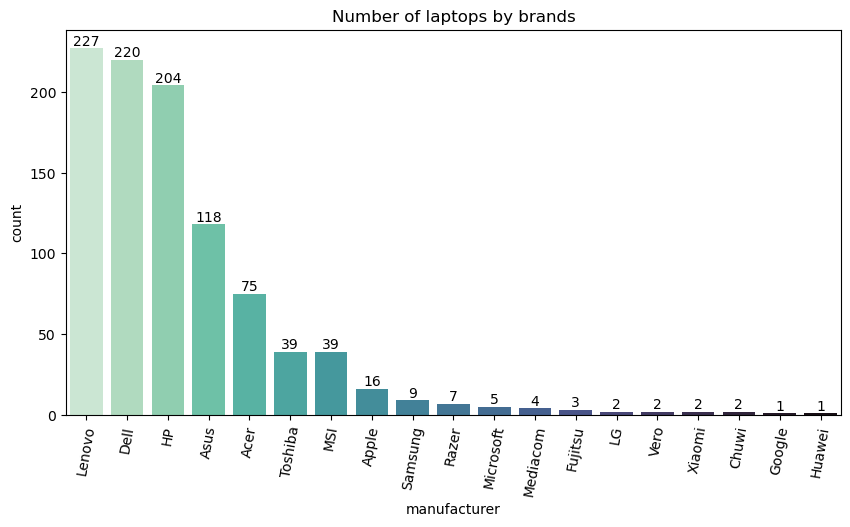

In [70]:
fig, ax  = plt.subplots(figsize = (10,5))
ax = sns.countplot(x = 'manufacturer', data = df_train, palette='mako_r', order = df_train['manufacturer'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by brands')
plt.show()

Most of laptops are from Dell, Lenovo and HP.

# What type of laptop is the most frequent?

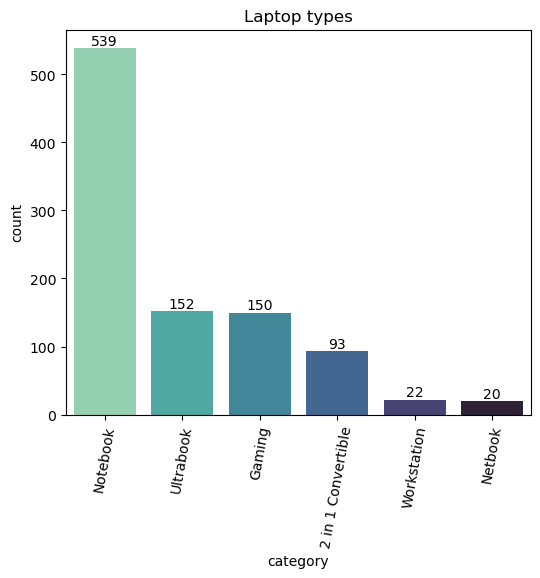

In [71]:
fig, ax  = plt.subplots(figsize = (6,5))
ax=sns.countplot(x = 'category', data = df_train, palette = 'mako_r', order = df_train['category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Laptop types')
plt.show()

Most laptops are of type notebooks followed by ultrabook and then the gaming ones.

# Which size is the most popular?

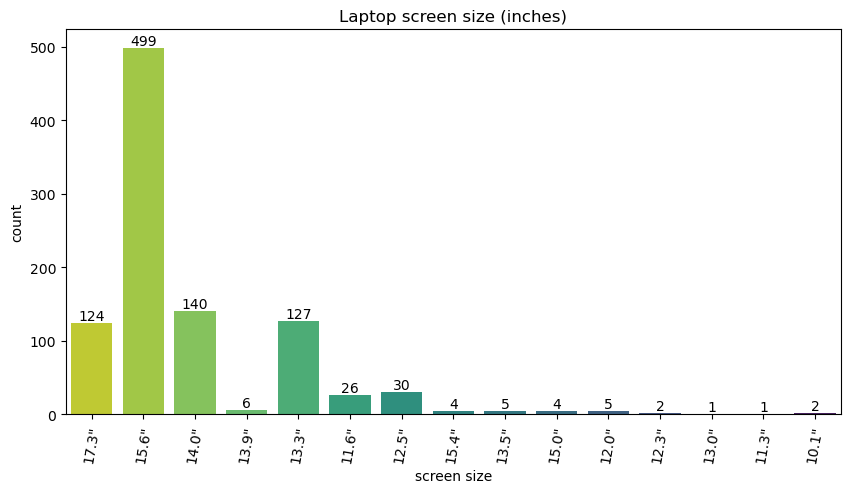

In [72]:
fig, ax  = plt.subplots(figsize = (10,5))
ax=sns.countplot(x = 'screen size', data = df_train, palette = 'viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

Majority of the laptops have 15.6 inches.

There are very few laptops with some "non conventional" sizes, which indeed appears in just few rows. For this reason, we will only keep laptops with the more conventional sizes.

In [73]:
inches_list = df_train['screen size'].value_counts().index[:6].tolist()
inches_list

['15.6"', '14.0"', '13.3"', '17.3"', '12.5"', '11.6"']

We will keep laptops with these 6 sizes!

In [74]:
df_clean = df_clean[df_clean['screen size'].isin(inches_list)]
df_test = df_test[df_test['screen size'].isin(inches_list)]

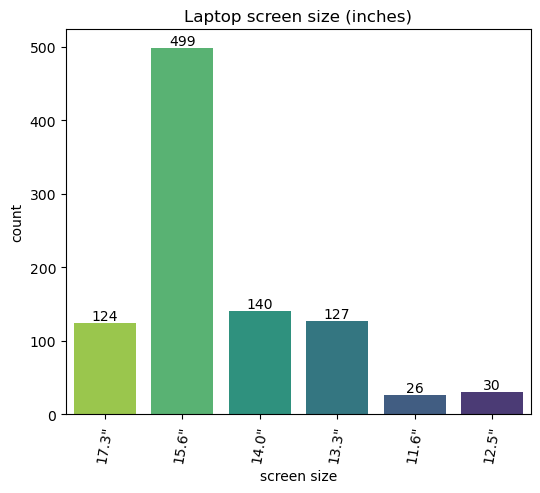

In [75]:
fig, ax  = plt.subplots(figsize = (6,5))
ax=sns.countplot(x = 'screen size', data = df_clean, palette = 'viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

In [76]:
print('We removed {} outliers!'.format(len(df_train)-len(df_clean)))

We removed 30 outliers!


## How is weight distributed among the laptops?

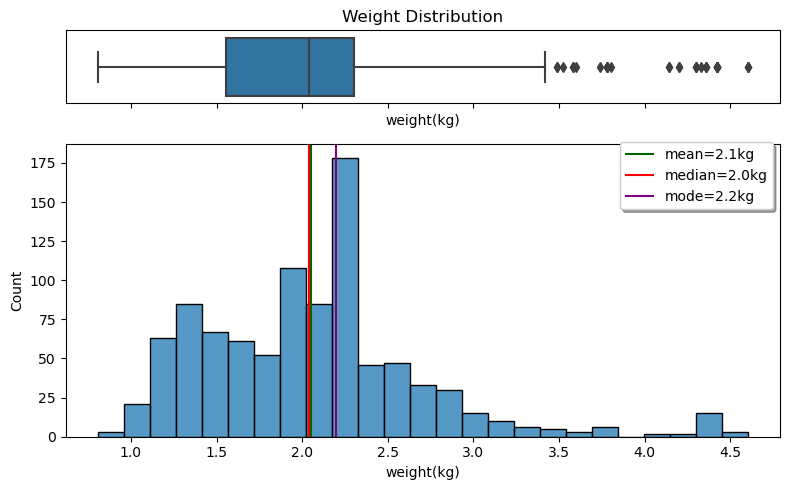

In [77]:
num_plot(df_clean, 'weight(kg)', 'Weight Distribution','kg')

## How is price distributed among the laptops?

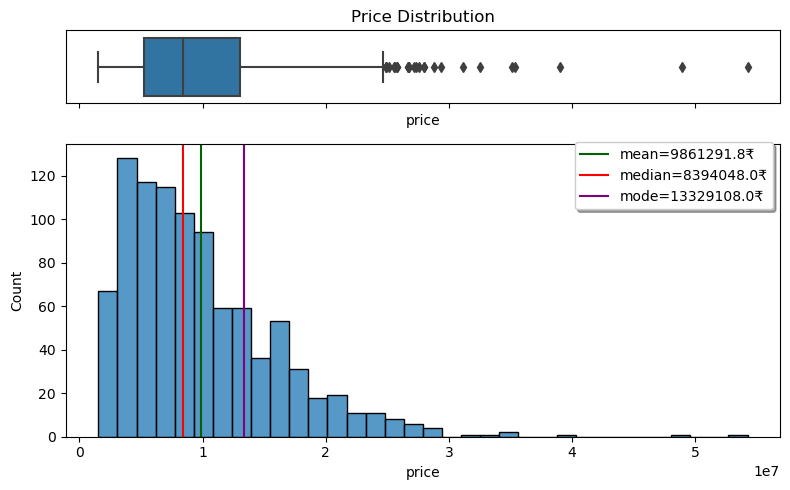

In [78]:
num_plot(df_clean, 'price', 'Price Distribution','₹')

In [79]:
import plotly.express as px
fig = px.box(df_train, y = 'price')
fig.show()

In [80]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

<AxesSubplot:xlabel='category', ylabel='price'>

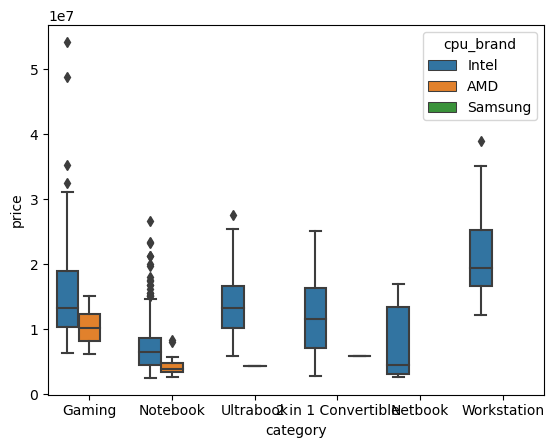

In [81]:
sns.boxplot(x = 'category', y = 'price', data = df_train[df_train['price'] > 2500000], hue = 'cpu_brand')

In [82]:
df_train[df_train['price'] > 2500000]

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,Dell,Alienware 17,Gaming,"17.3""",Intel Core i7 7700HQ,32.0,Nvidia GeForce GTX 1070,Windows,10,4.42,...,1920x1080,IPSPanel,0.0,2.8,512.0,SSD,1000.0,HDD,Intel,Nvidia
1,Dell,Inspiron 3552,Notebook,"15.6""",Intel Pentium Quad Core N3710,4.0,Intel HD Graphics,Windows,10,2.20,...,1366x768,NaN,0.0,1.6,500.0,HDD,0.0,NaN,Intel,Intel
2,Asus,Zenbook 3,Ultrabook,"14.0""",Intel Core i7 7500U,8.0,Intel HD Graphics 620,Windows,10,1.10,...,1920x1080,NaN,0.0,2.7,512.0,SSD,0.0,NaN,Intel,Intel
3,Dell,Inspiron 5568,2 in 1 Convertible,"15.6""",Intel Core i3 6100U,4.0,Intel HD Graphics 520,Windows,10,2.08,...,1920x1080,IPSPanel,1.0,2.3,1000.0,HDD,0.0,NaN,Intel,Intel
4,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,"13.9""",Intel Core i7 8550U,16.0,Intel UHD Graphics 620,Windows,10,1.40,...,3840x2160,IPSPanel,1.0,1.8,512.0,SSD,0.0,NaN,Intel,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,Dell,Vostro 5568,Notebook,"15.6""",Intel Core i7 7500U,8.0,Nvidia GeForce 940MX,Windows,10,2.18,...,1920x1080,NaN,0.0,2.7,256.0,SSD,0.0,NaN,Intel,Nvidia
972,Asus,VivoBook E403NA,Notebook,"14.0""",Intel Celeron Dual Core N3350,4.0,Intel HD Graphics 500,Windows,10,1.50,...,1366x768,NaN,0.0,1.1,32.0,FlashStorage,0.0,NaN,Intel,Intel
973,Lenovo,V110-15ISK (i5-6200U/4GB/128GB/W10),Notebook,"15.6""",Intel Core i5 6200U,4.0,Intel HD Graphics 520,Windows,10,2.10,...,1366x768,NaN,0.0,2.3,128.0,SSD,0.0,NaN,Intel,Intel
974,HP,ZBook 15u,Workstation,"15.6""",Intel Core i7 6500U,8.0,AMD FirePro W4190M,Windows,7,1.90,...,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN,Intel,AMD


## How is RAM distributed among the laptops?

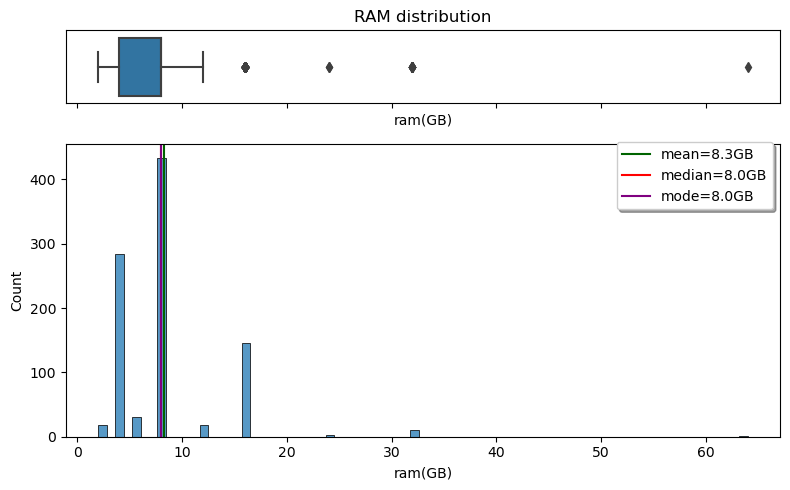

In [83]:
num_plot(df_clean, 'ram(GB)','RAM distribution','GB')

Most laptops have 8 GB ram.

## How is CPU frequency distributed among the laptops?

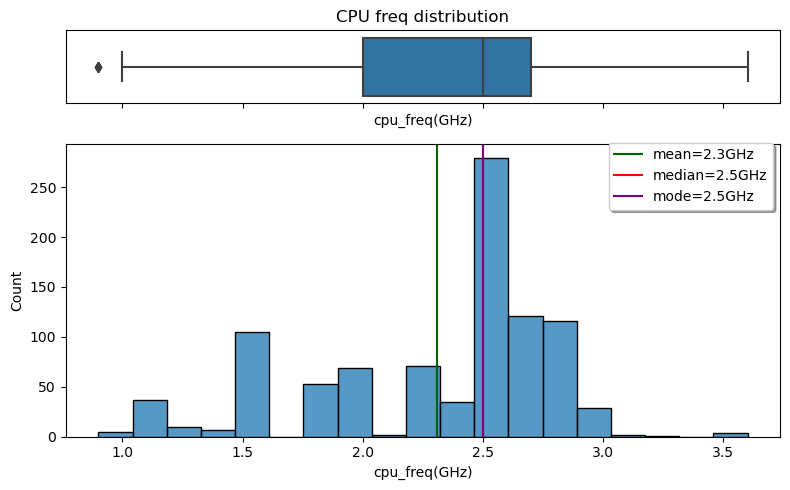

In [84]:
num_plot(df_clean, 'cpu_freq(GHz)','CPU freq distribution','GHz')

Most laptops have 2.5 GHz CPU

## How is Hard Drive capacity distributed among the laptops?

First, we will analyze the first hard drive storage capacity

In [85]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

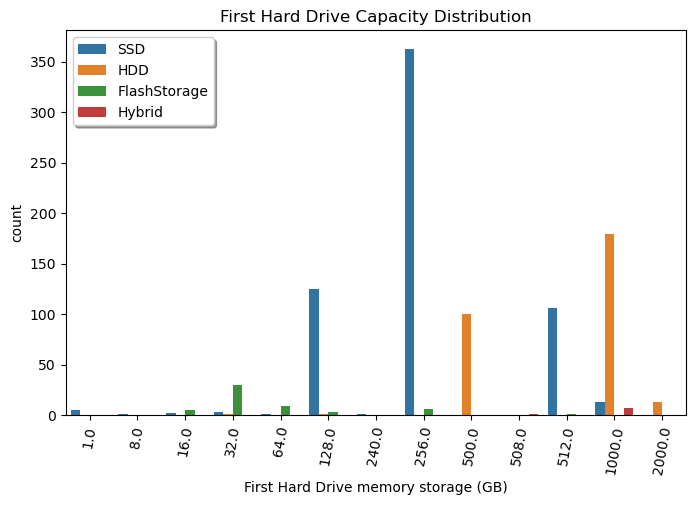

In [86]:
fig, ax  = plt.subplots(figsize=(8,5))
ax = sns.countplot(x = 'storage_1_gb', data = df_train, hue = 'storage_1_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.set_xlabel('First Hard Drive memory storage (GB)')
plt.title('First Hard Drive Capacity Distribution')
plt.legend(loc = 'upper left', ncol = 1, fancybox = True, shadow = True, frameon = True)
plt.show()

Most PCs have 256 GB of storage, which is for the most part SSD. Moreover, for storage of 1 TB or higher, most of them are HDD.

### Second hard Drive analysis

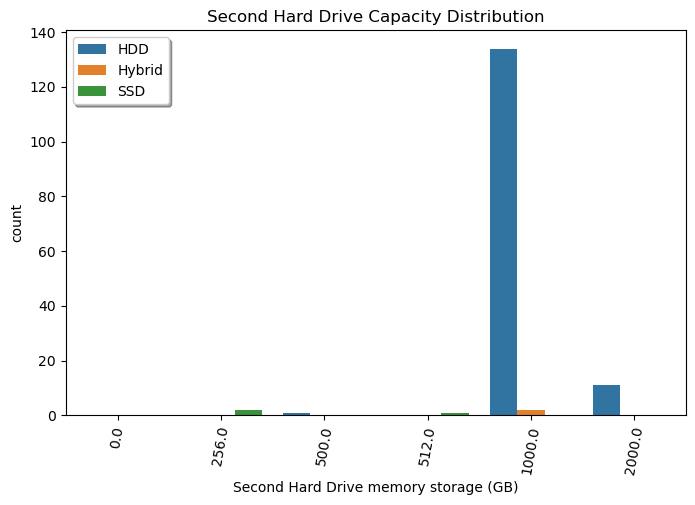

In [87]:
fig, ax  = plt.subplots(figsize = (8,5))
ax=sns.countplot(x = 'storage_2_gb', data = df_train, hue = 'storage_2_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.set_xlabel('Second Hard Drive memory storage (GB)')
plt.title('Second Hard Drive Capacity Distribution')
plt.legend(loc = 'upper left', ncol = 1, fancybox = True, shadow = True, frameon = True)
plt.show()

Most of second hard drive storages are 1 TB HDD disks

Until now we analyzed each single feature at a time, in the following we will analyze these features together to find useful insghts about the data.

# Multivariate outliers detection

## Price vs RAM

We define a custom plot function, which computes, returns and plots a linear regression line.

In [88]:
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x = col_x, y = col_y, data = df, color='#0d98ba', line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept

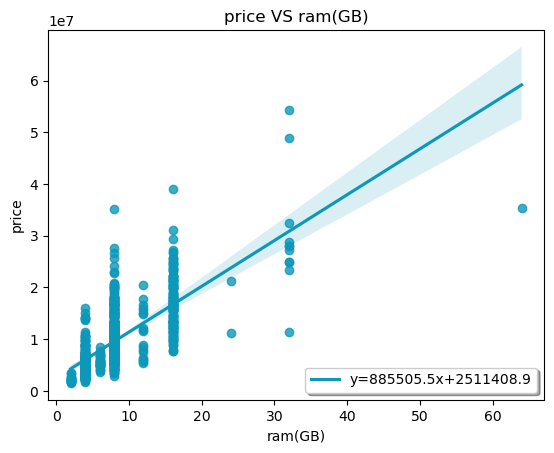

In [89]:
slope, intercept = lr_plot(df_clean,'ram(GB)','price', 'lower right')

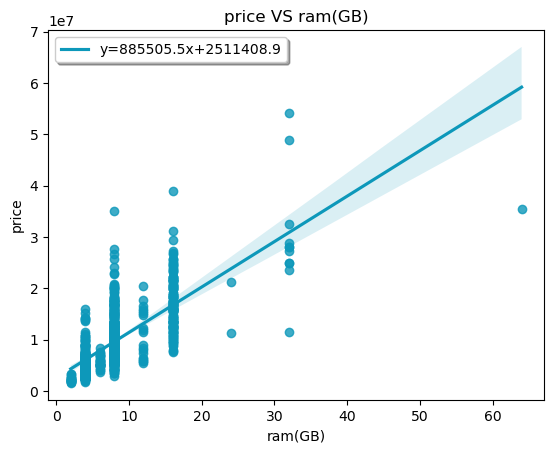

In [90]:
slope, intercept = lr_plot(df_clean, 'ram(GB)', 'price', 'upper left')

By removing the outlier value we can see that the slope increases and the intercept decreases.

## Price vs CPU Frequency

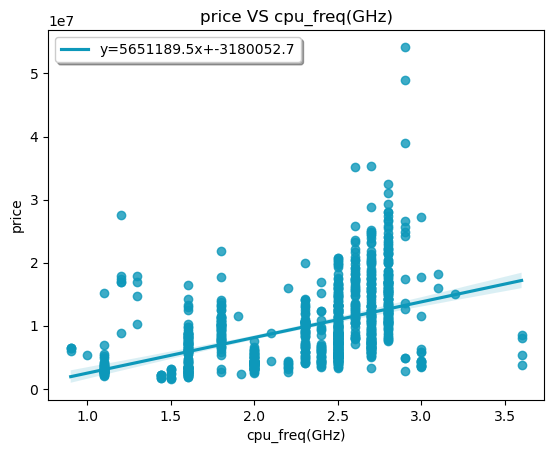

In [91]:
slope, intercept = lr_plot(df_clean, 'cpu_freq(GHz)', 'price', 'upper left')

We can see a positive trend between price and the CPU frequency, with no obvious outliers. <br>

## Price vs inches

In [92]:
df_clean.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

for i in range(len(df_clean)):
    df_clean['screen size'][i] = re.sub('"', '', df_clean['screen size'][i])

for i in range(len(df_test)):
    df_test['screen size'][i] = re.sub('"', '', df_test['screen size'][i])

df_clean['screen size'] = df_clean['screen size'].astype(float)
df_test['screen size'] = df_test['screen size'].astype(float)

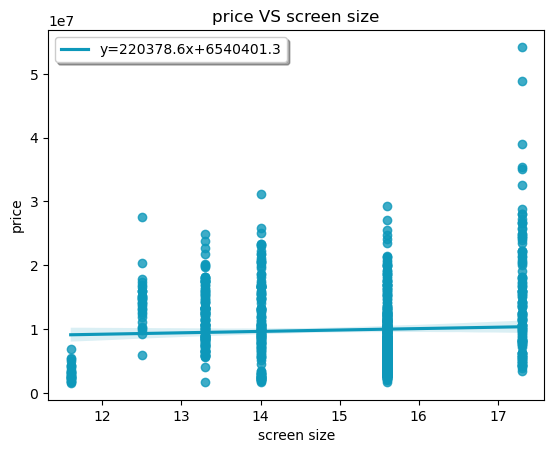

In [93]:
slope, intercept = lr_plot(df_clean, 'screen size', 'price', 'upper left')

The regression line is almost flat, meaning that PCs with higher screen inches slightly tends to be more expensive.

## Weight vs Inches

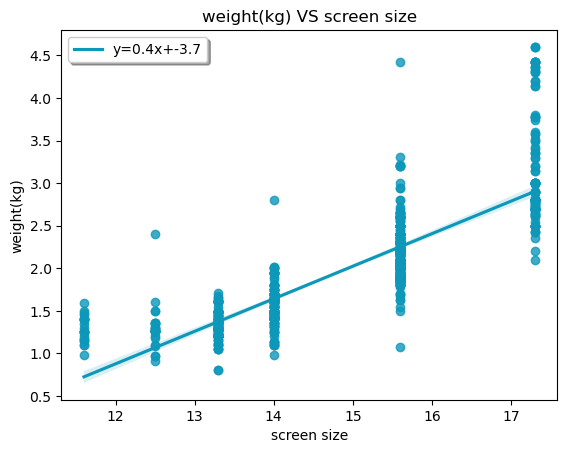

In [94]:
slope, intercept = lr_plot(df_clean, 'screen size', 'weight(kg)', 'upper left')

As expected, PCs with bigger screens are heavier. In particular, on average, for every additional inch the pc is 400g heavier.

# Price VS CPU brand by GPU brand

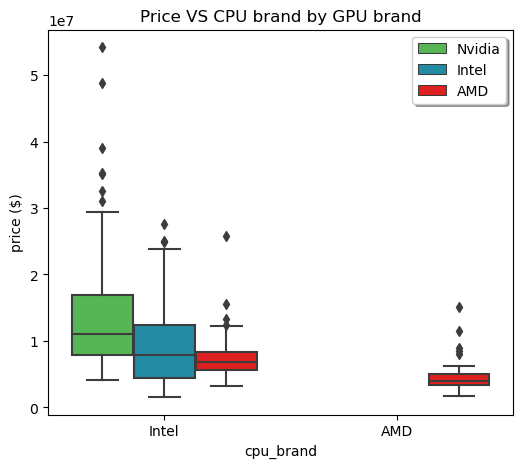

In [95]:
cpu_palette = {'Intel':'#0d98ba', 'AMD':'#FF0000', 'Nvidia':'#46C646'}
fig, ax = plt.subplots(figsize = (6,5))
sns.boxplot(x = 'cpu_brand', y = 'price', data = df_clean, hue = 'gpu_brand', palette = cpu_palette)
ax.set_title('Price vs CPU brand by GPU brand')
plt.ylabel('price ($)')
plt.legend(loc = 'upper right', ncol=1, fancybox = True, shadow = True, frameon = True)
plt.title('Price VS CPU brand by GPU brand')
plt.show()

Insights from this plot:
- Laptops with Intel CPUs are more expensive.
- Laptops with an AMD CPUs also hahave and AMD GPUs
- Laptops with Nvidia GPUs are more expensive.

# Which are the TOP 15 most common GPUs?

In [96]:
gpu_list = df_clean['gpu'].value_counts()[:15].index.tolist()

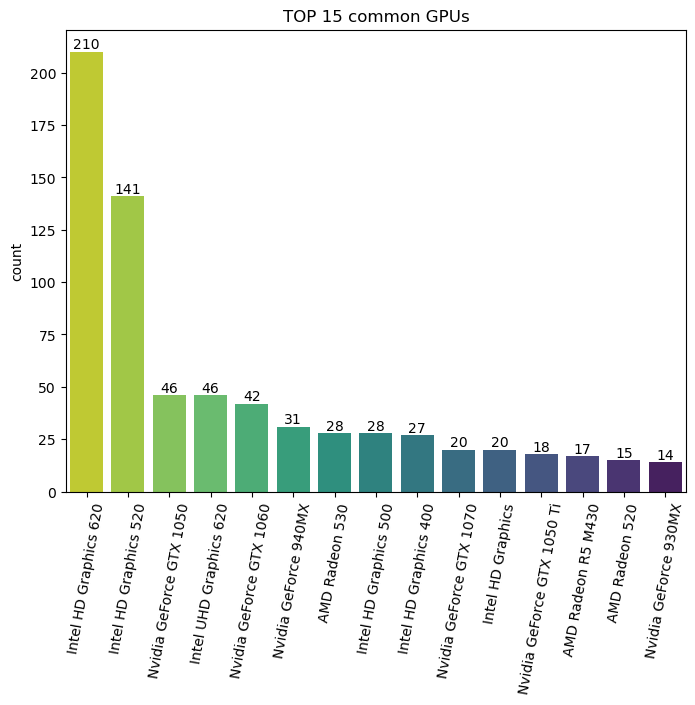

In [97]:
plt.figure(figsize = (8,6))
ax=sns.countplot(x = 'gpu', data = df_clean[df_clean['gpu'].isin(gpu_list)], order = gpu_list, palette = 'viridis_r')
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common GPUs')
plt.xlabel('')
plt.show()

The 2 most common GPUs are integrated Intel GPUs HD Graphics 620 and 520, while the third one is the Nvidia GTX1050. 

# Which are the TOP 15 most common CPUs?

In [98]:
cpu_list = df_clean['cpu'].value_counts()[:15].index.tolist()

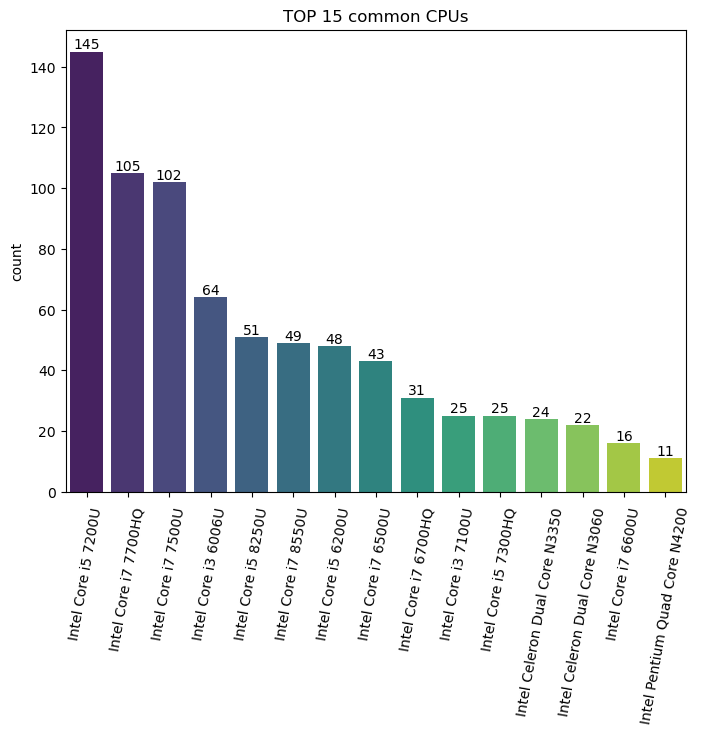

In [99]:
plt.figure(figsize = (8,6))
ax = sns.countplot(x = 'cpu', data = df_clean[df_clean['cpu'].isin(cpu_list)], order = cpu_list, palette = 'viridis')
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common CPUs')
plt.xlabel('')
plt.show()

- All the TOP 15 most common CPUs are from Intel.
- The most common CPU is the Intel i5 7200U, second is i7 7700HQ and third is i7 7500U.
- Out of the 15 CPUs, 10 are series 'U' (low voltage) , 3 are series 'HQ' (high performance) 10 and 2 are Celerons (low-end).

# What is the average price of laptops by company?

As seen previously, there are some companies which have just few laptops in the dataset:

In [100]:
df_clean['manufacturer'].value_counts()

Dell        219
Lenovo      218
HP          204
Asus        118
Acer         75
Toshiba      39
MSI          39
Razer         7
Apple         7
Samsung       5
Mediacom      4
Fujitsu       3
LG            2
Vero          2
Xiaomi        2
Chuwi         2
Name: manufacturer, dtype: int64

In particular, there are companies with less than 10 laptops in the dataset, which is a very low number from which we can extract statistical results. <br>
For this reason, we will consider only laptops with at least 20 laptops in the dataset.

In [101]:
company_list = df_clean['manufacturer'].value_counts().index[:8].tolist()
company_list

['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'Toshiba', 'MSI', 'Razer']

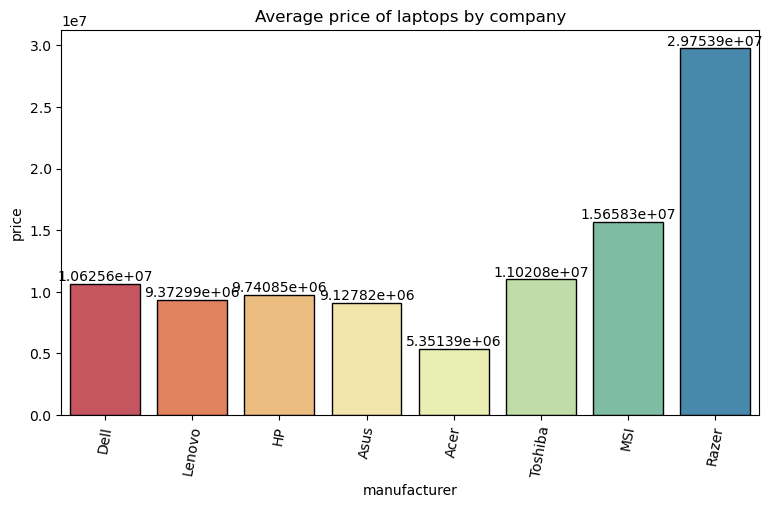

In [102]:
plt.figure(figsize = (9,5))
ax=sns.barplot(x = 'manufacturer', y = 'price', data = df_clean[df_clean['manufacturer'].isin(company_list)],
                order = company_list, 
                palette = 'Spectral', 
                ci = False,
                edgecolor = "black")
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Average price of laptops by company')
plt.show()

- MSI laptops are on average the most expensive.
- Apple laptops are the second most expensive laptops and Toshiba's are 3rd.
- Acer are the cheapest, with an average price of 626$
- Laptops from Dell, Lenovo, HP and Asus have, on average.

## Correlation Matrix

The correlation matrix can give some useful informations about the linear correlation between the numerical features

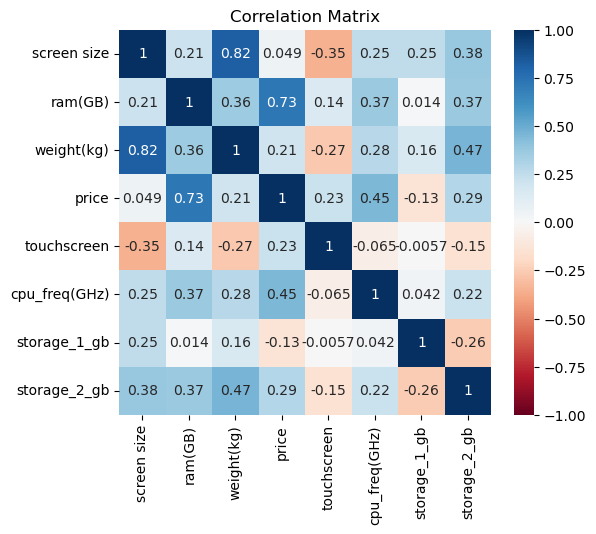

In [103]:
plt.figure(figsize = (6,5))
sns.heatmap(df_clean.corr(), cmap = 'RdBu', annot = True, vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()

Insights from the correlation matrix:
- RAM has a high positive correlation with price (+0.75): more expensive laptops tends to have a higher pric
- CPU Freq has a quite moderate positive correlation with the price (+0.45) 
- Inches and Weight have a high positive correlation (+0.82) since laptops with bigger screens tend to be heavier.

# Data preparation for ML modeling

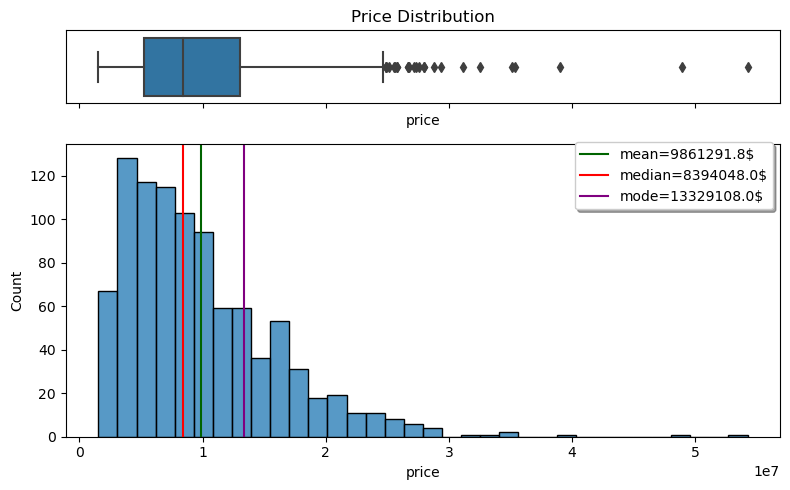

In [104]:
num_plot(df_clean, 'price', 'Price Distribution','$')

For prediction, we will use the cleaned dataframe 'df_clean'

In [105]:
df1 = df_clean.copy()

Moreover, since the target variable 'price' is right skewed, we will log transform it to improve the prediction performance of the algorithms.

In [106]:
df1['price'] = np.log(df1['price'])
df_test['price'] = np.log(df_test['price'])

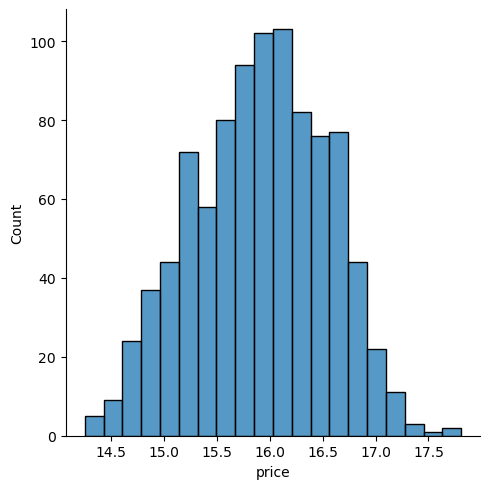

In [107]:
sns.displot(df1['price'])

Indeed now the distribution looks more gaussian.

In [108]:
df1 = df1.fillna('NaN')
df_test = df_test.fillna('NaN')

## Categorical features encoding

The categorical columns ('company','product','typename','cpu','gpu','opsys','resolution','screentype','resolution','memory_1_type','memory_2_type','gpu_brand','cpu_brand') will be now encoded. <br>
An encoding by one hot encoding would be preferrable in this case since there is not a order/hierarchy among the different categories for each variable, but this would lead to a very high number of columns (around 900), which is close to the number of total rows (1000).<br>
So, if we had more data a OHE encoding would be preferrable, but in case a Label Encoding will be performed to keep the number of features lower.

In [109]:
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

In [110]:
cat_cols =  ['manufacturer', 'model name', 'category', 'cpu', 'gpu', 'operating system',
             'resolution', 'screen_type', 'storage_1_type', 'storage_2_type',
             'gpu_brand', 'cpu_brand']

In [111]:
#One hot encoding
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(df1, columns = cat_cols, drop_first = True).shape)

Dataframe encoded by OHE dimension :  (946, 714)


In [112]:
#Label encoding
en = LabelEncoder()

for cols in cat_cols:
    df1[cols] = en.fit_transform(df1[cols])

for cols in cat_cols:
    df_train[cols] = en.fit_transform(df_train[cols])

print('Dataframe encoded by Label encoding dimension : ', df1.shape)

Dataframe encoded by Label encoding dimension :  (946, 21)


In [113]:
df1.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,4,46,1,17.3,67,32.0,66,4,10,4.42,...,3,0,0.0,2.8,512.0,3,1000.0,0,1,2
1,4,187,3,15.6,74,4.0,31,4,10,2.20,...,0,2,0.0,1.6,500.0,1,0.0,2,1,1
2,2,487,4,14.0,63,8.0,42,4,10,1.10,...,3,2,0.0,2.7,512.0,3,0.0,2,1,1
3,4,195,0,15.6,41,4.0,38,4,10,2.08,...,3,0,1.0,2.3,1000.0,1,0.0,2,1,1
4,4,191,4,13.3,56,4.0,7,4,10,1.40,...,3,0,0.0,1.6,256.0,3,0.0,2,1,0


## Data preparation

In [114]:
x_train = df1.drop('price', axis = 1).values
y_train = df1['price'].values

x_test = df_test.drop('price', axis = 1).values
y_test = df_test['price'].values

## Train - Validation split

Moreover, we define an additional validation set, which will be used to monitor overfitting.

In [115]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = seed)

And now you can move on with buildig models!

Thanks for sparing your time! Do upvote if you liked it, This motivates hugely to come up with new explorations and keep exploring new domains.

It would be really nice if you check my other works and if you like my work then don't forget to follow for more interesting notebooks 🤗